**Day 6 - June 10 2022**

| Student                       | ID        |
| -------------                 |:---------:|
| Benjamin Starostka Jakobsen   | s184198   |
| Muhammad REDACTED             | REDACTED  |
| Victor REDACTED               | REDACTED  |

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import chisquare

sns.set_style("white")

# Exercise 8
# Bootstrapping

## 1
**Exercise 13 in Chapter 8 of Ross (P.152).**

**Let $X_1,..., X_n$ be independent and identically distributed random variables having unknown mean $\mu$. For given constants $a < b$, we are interested in estimating**
$$
p = P(a < \sum_{i=1}^{n} \frac{X_i}{n} - \mu < b)
$$

The probability $p$, with $\bar{x}$ the sample mean of the original dataset (constant), is equivalent to 
$$
p = P(a < \bar{x} - \mu < b)
$$
$$
p = P(a - \bar{x} <  - \mu < b - \bar{x})
$$
$$
p = P(\bar{x}-a >  \mu > \bar{x}-b)
$$

In others words, $p$ is the probability that the unknown mean $\mu$ is in the interval $[\bar{x}-b, \bar{x}-a]$.

### (a)
**Explain how we can use the bootstrap approach to estimate p.**

• Create $r$ simulated datasets by randomly sampling $n$ elements with replacement from the original dataset. 

• Compute the sample mean for each of those simulated datasets. 

• Count the number of times that the sample means fall into the interval $[\bar{x}-b, \bar{x}-a]$.

Then, the estimate of the probability $p$ is the average, $i.e.$ the count divided by the number of simulated datasets $r$.

### (b)
**Estimate $p$ if $n = 10$ and the values of the $X_i$ are 56, 101, 78, 67, 93, 87,
64, 72, 80, and 69.**

**Take $a=-5$, $b =5$.**

In [ ]:
a = -5
b = 5
X = [56, 101, 78, 67, 93, 87, 64, 72, 80, 69]
n = len(X)
x_bar = np.mean(X)

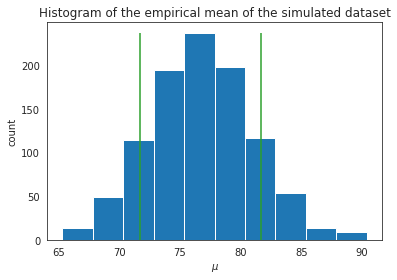

In [ ]:
r = 1000
mus = []
for i in range(r):
    simulated_dataset = np.random.choice(X, n, replace=True)
    mus += [np.mean(simulated_dataset)]

fig, ax = plt.subplots()
hist = ax.hist(mus)
ax.vlines(x=x_bar - a, ymin=0, ymax=max(hist[0]), color="C2")
ax.vlines(x=x_bar - b, ymin=0, ymax=max(hist[0]), color="C2")
ax.set(
    xlabel=r"$\mu$",
    ylabel="count",
    title=r"Histogram of the empirical mean of the simulated dataset",
)
plt.show()

In [ ]:
p = np.sum(np.array((a < x_bar - mus) & (x_bar - mus < b))) / r
print("The sample mean of the original dataset, x bar, equals", x_bar)
print("The probability that the true mean mu is in [x_bar-5, x_bar+5] is", p)

The sample mean of the original dataset, x bar, equals 76.7
The probability that the true mean mu is in [x_bar-5, x_bar+5] is 0.751


## 2
**Exercise 15 in Chapter 8 of Ross (P.152).**

**In the following three exercises $X_1 ,..., X_n$ is a sample from a distribution
whose variance is (the unknown) $\sigma^2$. We are planning to estimate $\sigma^2$ by the
sample variance $S^2 = \sum^n{i=1}(X_i-X)^2/(n-1)$,and we want to use the bootstrap
technique to estimate $Var(S^2)$.**

**If n = 15 and the data are 5, 4, 9, 6, 21, 17, 11, 20, 7, 10, 21, 15, 13, 16, 8
approximate (by a simulation) the bootstrap estimate of $Var(S^2)$**

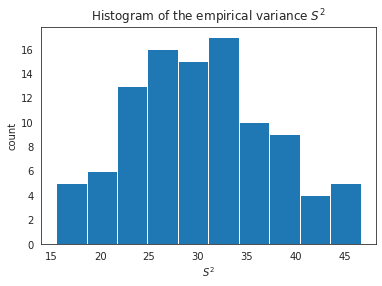

In [ ]:
X = [5, 4, 9, 6, 21, 17, 11, 20, 7, 10, 21, 15, 13, 16, 8]
n = len(X)

variances = []
r = 100
for i in range(r):
    simulated_dataset = np.random.choice(X, n, replace=True)
    variances += [np.var(simulated_dataset)]

variances = np.array(variances)

fig, ax = plt.subplots()
ax.hist(variances)
ax.set(
    xlabel=r"$S^2$", ylabel="count", title=r"Histogram of the empirical variance $S^2$"
)

plt.show()

In [ ]:
varS2 = np.var(variances)
print(varS2)

50.29617837827163


## 3
**Write a subroutine that takes as input a “data” vector of
observed values, and which outputs the median as well as the
bootstrap estimate of the variance of the median, based on
$r = 100$ bootstrap replicates. Simulate $N = 200$ Pareto
distributed random variates with $\beta = 1$ and $k = 1.05$.**

In [ ]:
N = 200
beta = 1
k = 1.05
X = stats.pareto.rvs(scale=beta, b=k, size=N)

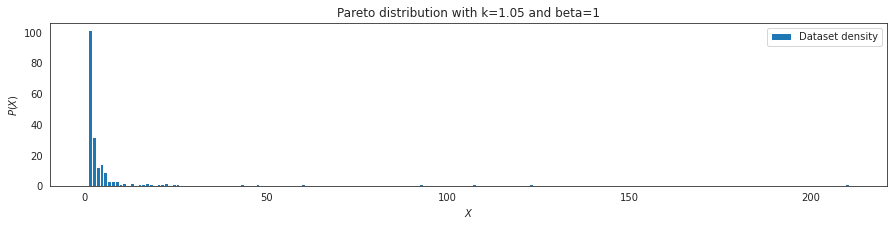

In [ ]:
# plot histogram and pdf
fig, ax = plt.subplots(1, 1, figsize=(15, 3))
x = np.linspace(
    stats.pareto.ppf(0.1, scale=beta, b=k), stats.pareto.ppf(0.9, scale=beta, b=k), N
)
y = stats.pareto.pdf(x, scale=beta, b=k)
# ax.plot(x, y, '-', lw=1, alpha=0.5, color='red', label='Analytical PDF')
ax.hist(X, bins=200, label="Dataset density")
ax.legend()
ax.set(
    xlabel=r"$X$",
    ylabel=r"$P(X)$",
    title=f"Pareto distribution with k={k} and beta={beta}",
)
plt.show()

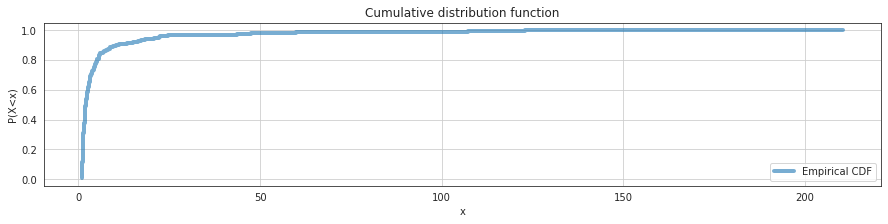

In [ ]:
X_sorted = np.sort(X)
cdf_observed = np.arange(1, N + 1) / N
cdf_expected = stats.pareto.cdf(X_sorted, scale=beta, b=k)
fig, ax = plt.subplots(1, 1, figsize=(15, 3))
# ax.plot(X_sorted,cdf_expected, '-', lw=4, alpha=0.6, label='Analytical CDF')
ax.step(X_sorted, cdf_observed, "-", lw=4, alpha=0.6, label="Empirical CDF")
ax.set(xlabel="x", ylabel=r"P(X<x)", title="Cumulative distribution function")
ax.legend()
ax.grid()

plt.show()

### (a)
**Compute the mean and the median (of the sample)**

In [ ]:
mean = np.mean(X)
median = np.median(X)
print("Mean:", mean)
print("Median:", median)

Mean: 7.050872095269907
Median: 1.9992234581129629


### (b) (c)
**Make the bootstrap estimate of the variance of the sample mean.**

**Make the bootstrap estimate of the variance of the sample median.**

In [ ]:
# Boostrap
r = 100
means = []
medians = []
for i in range(r):
    simulated_dataset = np.random.choice(X, n, replace=True)
    means += [np.mean(simulated_dataset)]
    medians += [np.median(simulated_dataset)]

means = np.array(means)

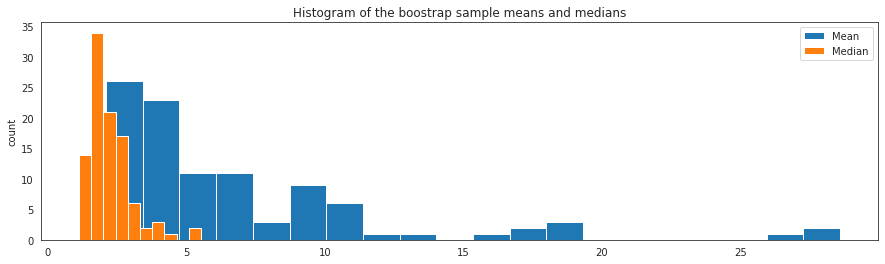

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.hist(means, bins=20, label="Mean")
ax.hist(medians, bins=10, label="Median")
ax.set(ylabel="count", title=r"Histogram of the boostrap sample means and medians")
ax.legend()
plt.show()

In [ ]:
print("Boostrap estimate of the variance of the sample mean:", np.var(means))
print("Boostrap estimate of the variance of the sample median:", np.var(medians))

Boostrap estimate of the variance of the sample mean: 28.426021922748358
Boostrap estimate of the variance of the sample median: 0.6058294012338901


### (d)
**Compare the precision of the estimated median with the precision of the estimated mean.**

During bootstrap, some simulated datasets will contains outliers.

On the one hand, the sample mean is not robust to outliers, and will be influenced by those outliers. Thus, the sample means of datasets containing outlier(s) will be large, while the sample means of the others will be lower. This results in a very large variance of the sample means. 

On the other hand, the median is robust to outliers, and the values for the sample median for all of the simulated datasets will be close to each other, resulting in a very low variance.

All in all, the estimate of the sample median is a lot more precise, because its variance is lower (it varies less depending on the dataset).

Moreover, we know that the sample mean estimator, $\bar{x}$ has the variance, $\frac{1}{n}Var(X)$. 
To estimate this, we (typically) just use the sample variance $\frac{1}{n}S^2$. 

In [ ]:
print(
    "Variance of the sample mean just using the sample variance:", (1 / N) * np.var(X)
)

Variance of the sample mean just using the sample variance: 2.1039928455846817


We see that just using the sample variance $S^2$ to compute the estimate of the variance of the sample mean gives a very different value than the one computed using bootstrap. The value obtained with bootstrap is a better estimate of the true variance of the sample mean.